### Stock Boost

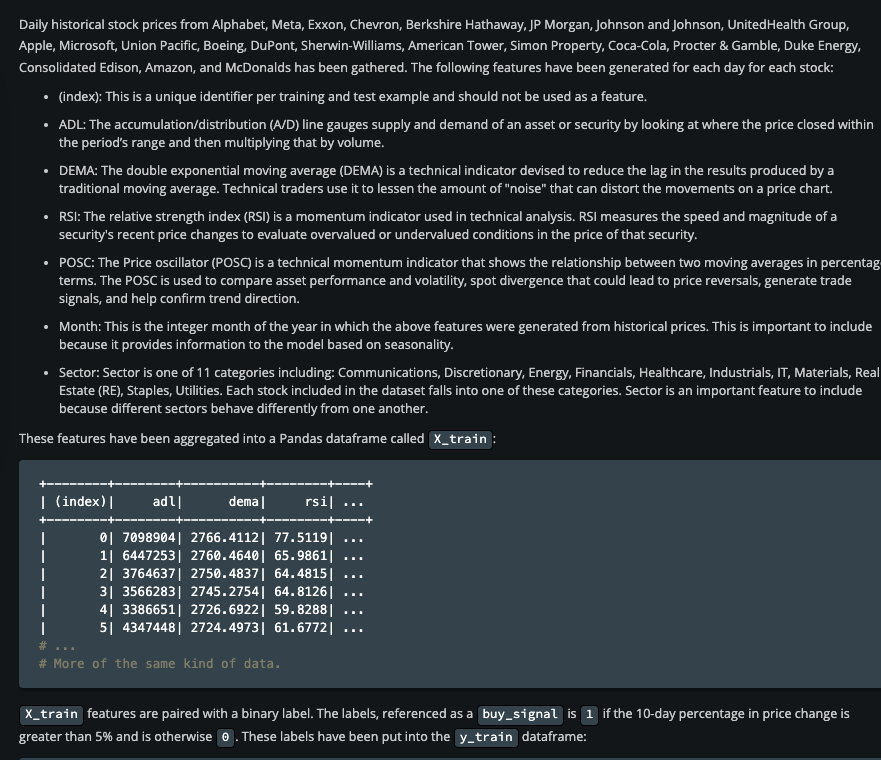

In [ ]:
"""
PseudoCode and Comments - 
1. Features -> ADL, DEMA, RSI, POSC, Month, Sector
2. Model -
    a. XG Boost : 
        Objective: Binary Logistic Regression
        Performance >= 89% accuracy on test
"""
import xgboost as xgb

def stock_boost(X_train, y_train, X_test):
    # Write your code here
    d_train = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    d_test = xgb.DMatrix(X_test, enable_categorical=True)
    stock_boost_model = xgb.train({"objective": "binary:logistic",
                                  "tree_method": "exact",
                                   "max_cat_to_onehot": 11,
                                   "eta": .32,
                                   "max_depth": 7}, d_train)
    raw_predictions = stock_boost_model.predict(d_test)
    threshold_predictions = [1 if value > 0.5 else 0 for value in raw_predictions]
    X_test['buy_signal'] = threshold_predictions
    y_test_predictions = X_test[['buy_signal']].copy()
    X_test.drop('buy_signal', axis=1, inplace=True)
    
    return y_test_predictions